# 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Фиксируем RANDOM SEED и версии пакетов
RANDOM_SEED = 42

# 2. Импорт данных

In [8]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

pd.set_option('display.max_columns', None)

In [20]:
# Тренировочный датасет
display(train.sample(3))

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
73440,19831,27JAN2014,SCH,F,38,N,N,0,0,-1.705802,0,40,2,3,16000,1,3,N,0
15381,104767,23APR2014,SCH,F,67,N,N,0,0,-2.565918,3,60,2,3,10000,4,1,N,0
37954,8299,15JAN2014,GRD,F,50,Y,Y,0,0,-2.354038,3,40,1,2,45500,1,2,N,0


In [21]:
# Тестовый датасет
display(test.sample(3))

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
27248,87904,04APR2014,GRD,M,39,Y,N,0,0,-2.618899,1,50,1,1,30000,1,3,N
22655,17789,24JAN2014,GRD,F,28,N,N,0,0,-1.920823,0,40,1,2,5000,1,2,N
35454,3983,10JAN2014,GRD,M,27,Y,Y,0,0,-1.410818,1,80,2,3,50000,1,4,N


In [18]:
print(f"Датасет имеет {train.shape[1]} столбцов/признаков.")
print(f"Тренировочный датасет состоит из {len(train)} строк.")
print(f"Тестовый датасет состоит из {len(test)} строк.")

Датасет имеет 19 столбцов/признаков.
Тренировочный датасет состоит из 73799 строк.
Тестовый датасет состоит из 36349 строк.


In [22]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
train['Train'] = 1 # помечаем где у нас трейн
test['Train'] = 0 # помечаем где у нас тест

df = train.append(test, sort=False).reset_index(drop=True) # объединяем

# 3. Предварительный анализ данных

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

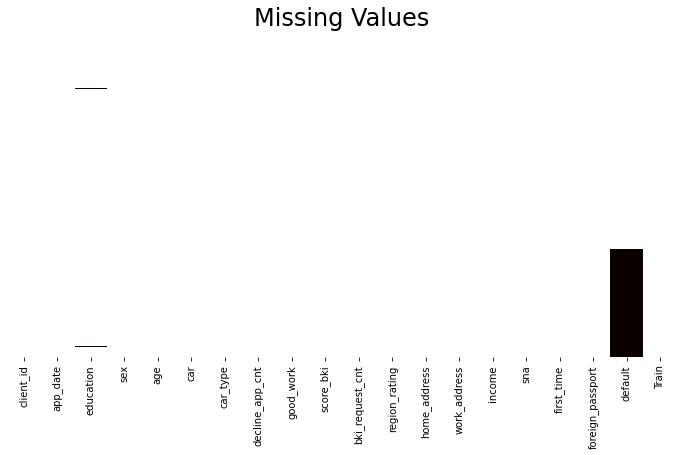

In [44]:
fig = plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='hot_r', yticklabels=[]).set_title('Missing Values', fontsize=24)

In [45]:
print(df.isna().sum())

client_id               0
app_date                0
education             478
sex                     0
age                     0
car                     0
car_type                0
decline_app_cnt         0
good_work               0
score_bki               0
bki_request_cnt         0
region_rating           0
home_address            0
work_address            0
income                  0
sna                     0
first_time              0
foreign_passport        0
default             36349
Train                   0
dtype: int64


Описания полей датасета

- client_id - идентификатор клиента
- education - уровень образования
- sex - пол заемщика
- age - возраст заемщика
- car - флаг наличия автомобиля
- car_type - флаг автомобиля иномарки
- decline_app_cnt - количество отказанных прошлых заявок
- good_work - флаг наличия “хорошей” работы
- bki_request_cnt - количество запросов в БКИ
- home_address - категоризатор домашнего адреса
- work_address - категоризатор рабочего адреса
- income - доход заемщика
- foreign_passport - наличие загранпаспорта
- sna - связь заемщика с клиентами банка
- first_time - давность наличия информации о заемщике
- score_bki - скоринговый балл по данным из БКИ
- region_rating - рейтинг региона
- app_date - дата подачи заявки
- default - флаг дефолта по кредиту  

Резюме по предварительному анализу: в тренировочной выборке 73799 клиентов, в тестовой - 36349. Всего данные о 110148 клиентах. Всего 20 переменных, из них 1 - временной ряд, 6 бинарных, 7 категориальных и 8 числовых. Всего пропусков 478, все пропуски в переменной education. client_id уникальный числовой признак, который не несет полезностей. В бинарных признаках наше целевая переменная default и искуственно добавленный признак тренировочной части датасета Train